In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel, NBEATSModel
from darts.models.forecasting.xgboost import XGBModel
from darts.models.forecasting.rnn_model import RNNModel

from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, smape, mae
from darts.utils.utils import ModelMode

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

/home/codespace/.python/current/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Config

In [10]:
country = "South Africa"
next_step = 5

In [11]:
df_aids = pd.read_csv("Cleaned HIV Data.csv")
series_aids = TimeSeries.from_dataframe(df_aids,
                                    time_col="Time"
                                    )

In [12]:
es_model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
es_model.fit(series_aids[country])

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=None, seasonal_periods=None, random_state=0)

In [13]:
es_pred = es_model.predict(next_step)

<Axes: xlabel='Time'>

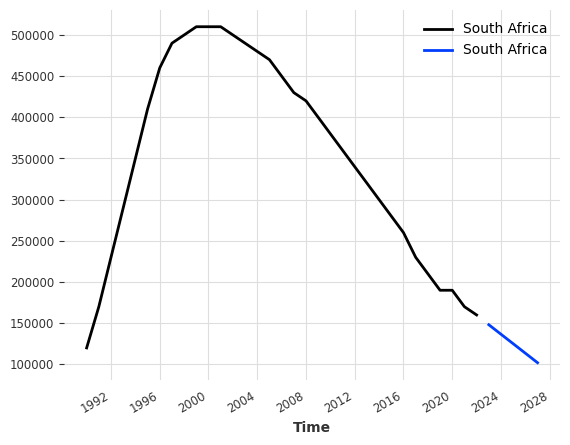

In [14]:
series_aids[country].plot()
es_pred.plot()

In [15]:
pd.read_csv('HIV_data 1990-2032.csv')

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global
0,1990,200.000000,100.0,200.000000,6800.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,1600.000000,200.000000,98000.000000,230000.000000,2.400000e+06
1,1991,500.000000,100.0,200.000000,8000.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,3400.000000,200.000000,100000.000000,240000.000000,2.600000e+06
2,1992,500.000000,100.0,200.000000,9200.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,6300.000000,200.000000,100000.000000,230000.000000,2.900000e+06
3,1993,500.000000,100.0,500.000000,10000.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,10000.000000,200.000000,100000.000000,220000.000000,3.000000e+06
4,1994,500.000000,100.0,500.000000,12000.000000,NaN,100.000000,1000.0,NaN,200.000000,...,160000.000000,NaN,500.000000,NaN,NaN,14000.000000,500.000000,99000.000000,200000.000000,3.200000e+06
5,1995,500.000000,100.0,500.000000,14000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,160000.000000,NaN,500.000000,NaN,NaN,16000.000000,500.000000,95000.000000,180000.000000,3.200000e+06
6,1996,1000.000000,100.0,500.000000,15000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,150000.000000,NaN,500.000000,NaN,NaN,17000.000000,500.000000,93000.000000,160000.000000,3.200000e+06
7,1997,1000.000000,100.0,500.000000,17000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,150000.000000,NaN,500.000000,NaN,NaN,18000.000000,500.000000,91000.000000,150000.000000,3.200000e+06
8,1998,1000.000000,100.0,500.000000,18000.000000,NaN,100.000000,1000.0,NaN,1000.000000,...,140000.000000,NaN,500.000000,NaN,NaN,19000.000000,500.000000,89000.000000,140000.000000,3.100000e+06
9,1999,1000.000000,100.0,500.000000,20000.000000,NaN,100.000000,1000.0,NaN,1000.000000,...,130000.000000,NaN,1000.000000,NaN,NaN,20000.000000,500.000000,88000.000000,130000.000000,3.000000e+06


In [16]:
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
    'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 
    'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
    'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 
    'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 
    'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]
df = pd.read_csv('HIV_data 1990-2022.csv')
african_countries.append("Unnamed: 0")
df_africa = df[african_countries]
df_africa.rename(columns={"Unnamed: 0":"Time"},inplace =True)


In [17]:
df_africa["Time"] = pd.to_datetime(df_africa['Time'],format= "%Y")
df_africa.to_csv('Cleaned HIV Data.csv', index=False)

In [18]:
df_cleaned = pd.read_csv('Cleaned HIV Data.csv')
# df_cleaned.drop("Unnamed: 0", axis=1, inplace=True)
df_cleaned.dropna(inplace=True, axis=1)
df_cleaned
df_cleaned.to_csv('Cleaned HIV Data.csv', index=False)



In [19]:
cleaned_series_aids = TimeSeries.from_dataframe(df_cleaned,
                                    time_col="Time"
                                    )



In [20]:
df_predicted = pd.DataFrame()

In [21]:
for country in df_cleaned.columns:
    if country != "Time":
        es_model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
        es_model.fit(cleaned_series_aids[country])
        es_pred = es_model.predict(10)
        df_pred =  es_pred.pd_dataframe()
        df_predicted = pd.concat([df_predicted,df_pred], axis=1)

In [22]:
df_predicted.reset_index(inplace=True)

In [23]:

df_forecasted = pd.concat([df_cleaned, df_predicted],ignore_index=True)

In [24]:
df_forecasted["Time"] = pd.to_datetime(df_forecasted['Time'])
df_forecasted = df_forecasted.set_index("Time").astype("int")

In [25]:
import utils

In [41]:
a = df_forecasted.transpose()[[str(pd.to_datetime(str(2020)))]]

In [42]:
import plotly.express as px

In [43]:
a.columns = ["values", "ISO"]
a = a.transpose()[[str(pd.to_datetime(str()))]].copy()
a["ISO"] = utils.country_iso_alpha3
a.columns = ["values", "ISO"]


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [51]:
a["ISO"] = utils.country_iso_alpha3
a.columns = ["New Cases", "ISO"]

In [52]:
fig2 = px.choropleth(
    a, 
    locations="ISO",
    color="New Cases",
    hover_name=a.index,
    color_continuous_scale=px.colors.sequential.YlOrRd,
    # color_continuous_scale=px.colors.diverging.balance,
    scope="africa",
    title=f"New HIV Population in year {2020}",
    height=600
    )

In [80]:
input_years = 2022


In [81]:
fig2.show()

In [79]:
a = str(pd.to_datetime(str(2000)))


'2000-01-01'

In [74]:
map_df.transpose().columns

Index(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
       '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
       '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
       '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
       '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
       '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
       '2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01',
       '2030-01-01', '2031-01-01', '2032-01-01'],
      dtype='object', name='Time')

In [71]:
map_df.transpose()[[]]

Time,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,...,2023-01-01,2024-01-01,2025-01-01,2026-01-01,2027-01-01,2028-01-01,2029-01-01,2030-01-01,2031-01-01,2032-01-01
Algeria,200,200,200,500,500,500,500,500,500,500,...,2264,2325,2385,2445,2506,2566,2627,2687,2747,2808
Angola,6800,8000,9200,10000,12000,14000,15000,17000,18000,20000,...,13747,12497,11246,9996,8745,7495,6244,4994,3743,2493
Benin,4800,5800,6600,7600,8000,8600,8600,8300,8100,7800,...,1237,975,713,451,189,-73,-335,-597,-859,-1121
Botswana,18000,24000,30000,34000,36000,35000,34000,31000,29000,27000,...,3543,2789,2034,1280,525,-229,-983,-1738,-2493,-3247
Burkina Faso,21000,21000,21000,19000,18000,16000,15000,14000,14000,13000,...,1472,1122,773,423,74,-275,-624,-974,-1323,-1673
Burundi,28000,26000,23000,17000,15000,16000,14000,12000,11000,10000,...,1085,873,661,449,236,24,-187,-399,-612,-824
Cabo Verde,200,200,200,200,200,200,200,200,500,500,...,200,200,200,200,200,200,200,200,200,200
Cameroon,16000,21000,28000,36000,44000,52000,58000,61000,63000,62000,...,7818,5730,3642,1554,-533,-2621,-4709,-6797,-8885,-10973
Central African Republic,16000,18000,20000,20000,21000,20000,20000,19000,17000,17000,...,9291,9082,8873,8664,8455,8246,8037,7828,7619,7410
Chad,8400,9800,11000,11000,12000,11000,11000,11000,11000,10000,...,3404,3023,2643,2262,1882,1501,1120,740,359,-20


In [33]:
map_df["ISO"] = utils.country_iso_alpha3
map_df.columns = ["New Cases", "ISO"]
fig2 = px.choropleth(
    map_df, 
    locations="ISO",
    color="New Cases",
    hover_name=map_df.index,
    color_continuous_scale=px.colors.sequential.YlOrRd,
    # color_continuous_scale=px.colors.diverging.balance,
    scope="africa",
    title=f"New HIV Population in year {input_years}",
    height=600
    )

KeyError: '2020-01-01 00:00:00'

In [28]:
map_df = map_df.transpose()[[str(pd.to_datetime(str(2020)))]].copy()
map_df["ISO"] = utils.country_iso_alpha3a

NameError: name 'map_df' is not defined

In [ ]:
a = str(pd.to_datetime("2022"))

In [ ]:
df1[a]

Algeria                               2200
Angola                               15000
Benin                                 1500
Botswana                              4300
Burkina Faso                          1900
Burundi                               1300
Cabo Verde                             200
Cameroon                              9900
Central African Republic              9500
Chad                                  3800
Comoros                                100
Congo                                16000
Côte d'Ivoire                         9000
Democratic Republic of the Congo     16000
Egypt                                 5100
Equatorial Guinea                     4700
Eritrea                                500
Eswatini                              4000
Ethiopia                              8300
Gabon                                 1900
Gambia                                1600
Ghana                                17000
Guinea                                5800
Guinea-Biss

In [ ]:
df_forecasted.to_csv('Forecasted HIV upto 2032.csv')

In [ ]:
map_df[sorted(set(country_list).intersection(df.columns))].transpose()[[input_years]].astype("int").copy()

In [ ]:
df_forecasted

,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cabo Verde,Cameroon,Central African Republic,Chad,...,Sao Tome and Principe,Senegal,Sierra Leone,South Africa,South Sudan,Sudan,Togo,Uganda,Zambia,Zimbabwe
Time,,,,,,,,,,,,,,,,,,,,,
1990-01-01,200,6800,4800,18000,21000,28000,200,16000,16000,8400,...,500,1600,4100,120000,7200,1400,5900,100000,98000,230000
1991-01-01,200,8000,5800,24000,21000,26000,200,21000,18000,9800,...,500,2000,4900,170000,9000,1700,7700,100000,100000,240000
1992-01-01,200,9200,6600,30000,21000,23000,200,28000,20000,11000,...,500,2400,5400,230000,10000,1800,9900,98000,100000,230000
1993-01-01,500,10000,7600,34000,19000,17000,200,36000,20000,11000,...,500,3000,5700,290000,12000,2000,12000,96000,100000,220000
1994-01-01,500,12000,8000,36000,18000,15000,200,44000,21000,12000,...,500,3700,6000,350000,12000,2200,13000,96000,99000,200000
1995-01-01,500,14000,8600,35000,16000,16000,200,52000,20000,11000,...,500,4400,6300,410000,14000,2300,15000,95000,95000,180000
1996-01-01,500,15000,8600,34000,15000,14000,200,58000,20000,11000,...,500,5200,6400,460000,14000,2500,16000,95000,93000,160000
1997-01-01,500,17000,8300,31000,14000,12000,200,61000,19000,11000,...,500,5900,6500,490000,15000,2500,16000,95000,91000,150000
1998-01-01,500,18000,8100,29000,14000,11000,500,63000,17000,11000,...,500,6600,6400,500000,14000,2600,16000,94000,89000,140000


In [ ]:
pd.read_csv("HIV_data 1990-2032.csv")

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global
0,1990,200.000000,100.0,200.000000,6800.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,1600.000000,200.000000,98000.000000,230000.000000,2.400000e+06
1,1991,500.000000,100.0,200.000000,8000.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,3400.000000,200.000000,100000.000000,240000.000000,2.600000e+06
2,1992,500.000000,100.0,200.000000,9200.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,6300.000000,200.000000,100000.000000,230000.000000,2.900000e+06
3,1993,500.000000,100.0,500.000000,10000.000000,NaN,100.000000,1000.0,NaN,100.000000,...,170000.000000,NaN,500.000000,NaN,NaN,10000.000000,200.000000,100000.000000,220000.000000,3.000000e+06
4,1994,500.000000,100.0,500.000000,12000.000000,NaN,100.000000,1000.0,NaN,200.000000,...,160000.000000,NaN,500.000000,NaN,NaN,14000.000000,500.000000,99000.000000,200000.000000,3.200000e+06
5,1995,500.000000,100.0,500.000000,14000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,160000.000000,NaN,500.000000,NaN,NaN,16000.000000,500.000000,95000.000000,180000.000000,3.200000e+06
6,1996,1000.000000,100.0,500.000000,15000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,150000.000000,NaN,500.000000,NaN,NaN,17000.000000,500.000000,93000.000000,160000.000000,3.200000e+06
7,1997,1000.000000,100.0,500.000000,17000.000000,NaN,100.000000,1000.0,NaN,500.000000,...,150000.000000,NaN,500.000000,NaN,NaN,18000.000000,500.000000,91000.000000,150000.000000,3.200000e+06
8,1998,1000.000000,100.0,500.000000,18000.000000,NaN,100.000000,1000.0,NaN,1000.000000,...,140000.000000,NaN,500.000000,NaN,NaN,19000.000000,500.000000,89000.000000,140000.000000,3.100000e+06
9,1999,1000.000000,100.0,500.000000,20000.000000,NaN,100.000000,1000.0,NaN,1000.000000,...,130000.000000,NaN,1000.000000,NaN,NaN,20000.000000,500.000000,88000.000000,130000.000000,3.000000e+06
